# Introduction
In this study, we will use Reinforcement Learning methods to determine the state of patterns. We will take three states: "buy", "nothing", "sell". We apply a "reward" if the pattern guessed the price change or a "penalty" if it didn't. We will use the same patterns that were found during the one day data. To evaluate the efficiency, we will calculate PL.

In [1]:
import pandas as pd
import numpy as np
from pickle import load
import matplotlib.pyplot as plt
import os 
os.chdir('../..')

In [2]:
similarity = 90
height, width = 10, 5
window = 3

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/{similarity}/{width}x{height}/Q_matrix_{window}.pkl', 'rb'))
count_cols = [col for col in Qmatrix_init.columns if 'count' in col] 
pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

columns_to_show = (['date', 'prototype', 'code']+buy_cols+hold_cols+sell_cols+count_cols+pl_cols).sort()

Qmatrix = Qmatrix_init[['date', 'prototype', 'code', 'buy', 'hold', 'sell']+pl_cols]
Qmatrix.head()

,date,prototype,code,buy,hold,sell,pl_iter_0,pl_iter_1,pl_iter_2,pl_iter_3,...,pl_iter_6,pl_iter_7,pl_iter_8,pl_iter_9,pl_iter_10,pl_iter_11,pl_iter_12,pl_iter_13,pl_iter_14,pl_iter_15
0,2020-01-02 09:30:00.002,0,"[0, 2, 0, 2, 0]",-0.01,-0.001,7.98,4.700000e-01,0.50,0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
1379,2020-01-02 09:30:00.002,1,"[2, 0, 2, 0, 3]",0.96,0.000,0.00,6.000000e-02,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
1444,2020-01-02 09:30:00.002,2,"[0, 2, 0, 3, 2]",0.16,0.000,0.00,1.000000e-02,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1473,2020-01-02 09:30:00.002,3,"[2, 0, 3, 2, 3]",-0.01,-0.001,0.16,5.684342e-14,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1504,2020-01-02 09:30:00.002,4,"[0, 3, 2, 3, 2]",-0.01,-0.010,0.81,5.000000e-02,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


### Visualization of learning process. Profit maximization

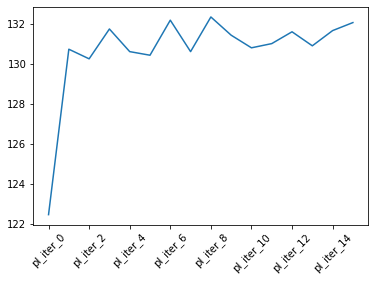

In [3]:
Qmatrix[pl_cols].sum().plot(rot=45);

### Max PL

In [18]:
# max PL
Qmatrix[pl_cols].sum().max()

132.3499999999981

#### Summary
We did a few iterations of learning patterns. Up is a view of the transient process of changing PL. During the first iteration, the model made the maximum of its improvement. After 4 iterations, the result fluctuates at its maximum level with minor changes.

In [5]:
stat_cols = ['buy_count', 'hold_count', 'sell_count',
                             'buy_profit', 'buy_loss', 'sell_profit', 'sell_loss',
                             'buy_profit_count', 'buy_loss_count', 'sell_profit_count', 'sell_loss_count']
iter_number = len(pl_cols)
iter_columns = ['iter_' + str(el) for el in range(iter_number)]

### Count of buys, holds and sells

In [6]:
buys = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_count')])
holds = pd.DataFrame(Qmatrix_init[('iter_0', 'hold_count')])
sells = pd.DataFrame(Qmatrix_init[('iter_0', 'sell_count')])
for iterat in iter_columns[1:]:
    buys = buys.join(Qmatrix_init[(iterat, 'buy_count')])
    holds = holds.join(Qmatrix_init[(iterat, 'hold_count')])
    sells = sells.join(Qmatrix_init[(iterat, 'sell_count')])
    
buys_1 = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_count')])
holds_1 = pd.DataFrame(Qmatrix_init[('iter_1', 'hold_count')])
sells_1 = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_count')])
for iterat in iter_columns[2:]:
    buys_1 = buys_1.join(Qmatrix_init[(iterat, 'buy_count')])
    holds_1 = holds_1.join(Qmatrix_init[(iterat, 'hold_count')])
    sells_1 = sells_1.join(Qmatrix_init[(iterat, 'sell_count')])

In [7]:
total_count_of_actions = {'buys': buys.sum().sum(), 'holds': holds.sum().sum(), 'sells': sells.sum().sum()}
total_count_of_actions_1 = {'buys': buys_1.sum().sum(), 'holds': holds_1.sum().sum(), 'sells': sells_1.sum().sum()}

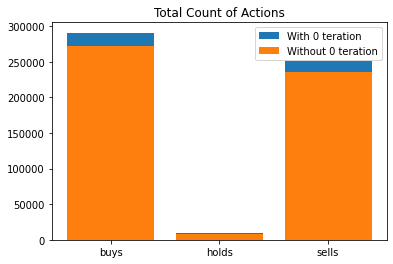

In [8]:
plt.bar(*zip(*total_count_of_actions.items()))
plt.bar(*zip(*total_count_of_actions_1.items()))
plt.title('Total Count of Actions')
plt.legend(['With 0 teration', 'Without 0 teration'])
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ax1.bar(*zip(*total_count_of_actions.items()), width = 0.7)
# ax2.bar(*zip(*total_count_of_actions_1.items()), width = 0.7)
# fig.suptitle('Profit / loss count distributions for BUY and SELL')
# plt.legend([ax1, ax2], ['With 0 teration', 'Without 0 teration'])
# plt.show()

#### Summary
The number of BUYs exceeds the rest of the pattern states. This is not due to the fact that the first random action during model initialization was defined as BUY. It can also be noted that the system of penalties has worked successfully and the patterns do not "sit out" in the HOLD state.

### Profit / loss disribution

In [9]:
buy_profit = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_profit')])
buy_loss = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_loss')])
sell_profit = pd.DataFrame(Qmatrix_init[('iter_0', 'sell_profit')])
sell_loss = pd.DataFrame(Qmatrix_init[('iter_0', 'sell_loss')])
for iterat in iter_columns[1:]:
    buy_profit = buy_profit.join(Qmatrix_init[(iterat, 'buy_profit')])
    buy_loss = buy_loss.join(Qmatrix_init[(iterat, 'buy_loss')])
    sell_profit = sell_profit.join(Qmatrix_init[(iterat, 'sell_profit')])
    sell_loss = sell_loss.join(Qmatrix_init[(iterat, 'sell_loss')])

In [10]:
buy_pl_distribution = {'buy_profit': buy_profit.sum().sum(), 'buy_loss': abs(buy_loss.sum().sum())}
sell_pl_distribution = {'sell_profit': sell_profit.sum().sum(), 'sell_loss': abs(sell_loss.sum().sum())}

In [11]:
# fig, ax = plt.subplots()
# ax.bar(*zip(*buy_pl_distribution.items()), width = 0.7, label='BUY')
# ax.bar(*zip(*sell_pl_distribution.items()), width = 0.7, label='SELL')
# plt.title('Profit / loss distributions for BUY and SELL')
# plt.legend()
# plt.show()

### Count of profit / loss deals

In [12]:
buy_profit_count = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_profit_count')])
buy_loss_count = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_loss_count')])
sell_profit_count = pd.DataFrame(Qmatrix_init[('iter_0', 'sell_profit_count')])
sell_loss_count = pd.DataFrame(Qmatrix_init[('iter_0', 'sell_loss_count')])
for iterat in iter_columns[1:]:
    buy_profit_count = buy_profit_count.join(Qmatrix_init[(iterat, 'buy_profit_count')])
    buy_loss_count = buy_loss_count.join(Qmatrix_init[(iterat, 'buy_loss_count')])
    sell_profit_count = sell_profit_count.join(Qmatrix_init[(iterat, 'sell_profit_count')])
    sell_loss_count = sell_loss_count.join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [13]:
buy_count_distribution = {'buy_profit': buy_profit_count.sum().sum(), 'buy_loss': abs(buy_loss_count.sum().sum())}
sell_count_distribution = {'sell_profit': sell_profit_count.sum().sum(), 'sell_loss': abs(sell_loss_count.sum().sum())}

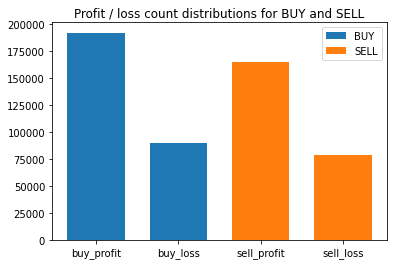

In [14]:
fig, ax = plt.subplots()
ax.bar(*zip(*buy_count_distribution.items()), width = 0.7, label='BUY')
ax.bar(*zip(*sell_count_distribution.items()), width = 0.7, label='SELL')
plt.title('Profit / loss count distributions for BUY and SELL')
plt.legend()
plt.show()

#### Summary
Patterns often choose the BUY state. This indicates an increase in the price of the instrument.

### Mean value for profit and loss

In [15]:
# calculate profit deals count and loss deals count
profit_deals_count = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_profit_count')]).join(Qmatrix_init[('iter_0', 'sell_profit_count')])
loss_deals_count = pd.DataFrame(Qmatrix_init[('iter_0', 'buy_loss_count')]).join(Qmatrix_init[('iter_0', 'sell_loss_count')])
for iterat in iter_columns[1:]:
    profit_deals_count = profit_deals_count.join(Qmatrix_init[(iterat, 'buy_profit_count')]).join(Qmatrix_init[(iterat, 'sell_profit_count')])
    loss_deals_count = loss_deals_count.join(Qmatrix_init[(iterat, 'buy_loss_count')]).join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [16]:
profit = buy_pl_distribution['buy_profit'] + sell_pl_distribution['sell_profit']
loss = buy_pl_distribution['buy_loss'] + sell_pl_distribution['sell_loss']

mean_profit_deal = profit / profit_deals_count.sum().sum()
mean_loss_deal = loss / loss_deals_count.sum().sum()

print(f'Mean_profit_deal: {mean_profit_deal}. \nMean_loss_deal: {mean_loss_deal}.')

Mean_profit_deal: 0.012262207624278383. 
Mean_loss_deal: 0.013521286245309856.


#### Summary
There is practically no difference between the average of a profitable and a losing trade.

## Summary
In this work, Reinforcement Learning techniques were applied to find sustainable patterns that could be profitable. The experiment was carried out with retention of 50 periods. Maximum PL equals 105 dollars. It is 20% less than by 5 periods model. The  model improves the quality of the patterns and better identifies the state that will bring the maximum benefit from iteration to iteration. The BUY condition prevails in deals. And the average value of a profitable trade is equal to a losing trade with value 3 cents.